In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.utils import *
from aeons.regress import *
from aeons.endpoint import *
from aeons.plotting import *
figsettings()

In [746]:
name, samples = get_samples('gauss_32')
true_endpoint = EndModel(samples).true_endpoint()
samples = samples.iloc[:true_endpoint]

In [751]:
logL_0 = samples.live_points(0).logL
# Search for the point with logL_birth = logL_0[0]
logL_birth = samples.live_points(0).logL_birth

In [36]:
def get_beta_analytic(logXs, d, sigma):
    return np.exp(np.log(d*sigma**2) - 2/d * logXs)

def get_betas_logL(samples):
    from scipy.interpolate import interp1d
    beta = np.logspace(-14, 14, 1000)
    logL = samples.logL_P(beta=beta)/beta
    i = np.argmin(logL < samples.logL.max())
    beta = np.concatenate([[0],beta[:i+1]])
    logL = np.concatenate([[samples.logL.min()],logL.iloc[:i+1]])
    f = interp1d(logL, beta)
    return f(samples.logL)
    
def get_betas_DKL(samples):
    from scipy.interpolate import interp1d
    beta = np.logspace(-14, 14, 1000)
    logX = -samples.D_KL(beta=beta)
    beta = np.concatenate([[0], beta])
    logX = np.concatenate([[0], logX])
    f = interp1d(logX, beta)
    return f(samples.logX())

In [110]:
name, samples = get_samples('gauss_32')
model = EndModel(samples)
true_endpoint = EndModel(samples).true_endpoint()

In [119]:
betas = np.logspace(-3, 0, 1000)

In [120]:
betas_DKL = get_betas_DKL(samples)
betas_logL = get_betas_logL(samples)

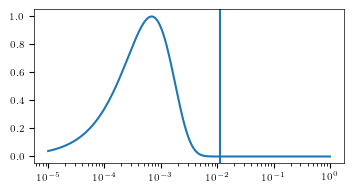

In [141]:
ndead = 10000

betas = np.logspace(-5, 0, 1000)
logXs = samples.logX().iloc[ndead]
logLs = samples.logL.iloc[ndead]
logLX = betas * logLs + logXs
logLX -= logsumexp(logLX)

logprob = logLX + np.log(betas)
logprob -= logprob.max()
prob = np.exp(logprob)

plt.plot(betas, prob)
plt.xscale('log')
plt.axvline(betas_logL[ndead])

In [146]:
logX = samples.logX()
logLX = samples._betalogL(beta=betas).add(logX, axis=0)
# logLX -= logsumexp(logLX,axis=0)

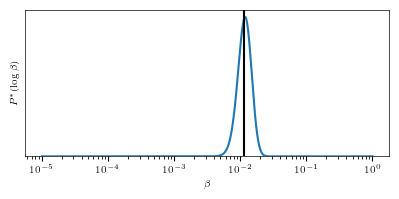

In [133]:
logX = samples.logX()
logLX = samples._betalogL(beta=betas).add(logX, axis=0)
logLX -= logsumexp(logLX,axis=0)

for i in [10000]:
     logprob = logLX.iloc[i] + np.log(betas)
     logprob -= logprob.max()
     np.exp(logprob).plot()
     plt.axvline(betas_logL[i], color='k')
     plt.xscale('log')

plt.ylabel(r'$P^*(\log\beta$)')
plt.yticks([])
plt.ylim(0,None)
plt.xlabel(r'$\beta$')
plt.tight_layout()

In [134]:
logLX

,beta,0.000010,0.000010,0.000010,0.000010,0.000010,0.000011,0.000011,0.000011,0.000011,0.000011,...,0.901478,0.911927,0.922497,0.933190,0.944006,0.954949,0.966017,0.977215,0.988542,1.000000
,weights,,,,,,,,,,,,,,,,,,,,,
0,0.000000e+00,-6.219599,-6.219634,-6.219669,-6.219705,-6.219741,-6.219777,-6.219814,-6.219851,-6.219889,-6.219927,...,-4408.917969,-4460.967716,-4513.622891,-4566.890515,-4620.777688,-4675.291597,-4730.439510,-4786.228780,-4842.666846,-4899.761231
1,0.000000e+00,-6.221593,-6.221628,-6.221663,-6.221698,-6.221734,-6.221771,-6.221807,-6.221845,-6.221882,-6.221920,...,-4408.528163,-4460.573368,-4513.223949,-4566.486925,-4620.369398,-4674.878551,-4730.021653,-4785.806056,-4842.239199,-4899.328605
2,0.000000e+00,-6.223588,-6.223623,-6.223658,-6.223693,-6.223729,-6.223765,-6.223802,-6.223839,-6.223877,-6.223915,...,-4408.249083,-4460.291031,-4512.938316,-4566.197958,-4620.077058,-4674.582799,-4729.722450,-4785.503362,-4841.932973,-4899.018806
3,0.000000e+00,-6.225581,-6.225615,-6.225650,-6.225686,-6.225722,-6.225758,-6.225795,-6.225832,-6.225869,-6.225907,...,-4407.791680,-4459.828303,-4512.470201,-4565.724394,-4619.597982,-4674.098147,-4729.232157,-4785.007363,-4841.431201,-4898.511195
4,0.000000e+00,-6.227572,-6.227607,-6.227642,-6.227677,-6.227713,-6.227749,-6.227785,-6.227822,-6.227860,-6.227898,...,-4407.186915,-4459.216504,-4511.851288,-4565.098284,-4618.964591,-4673.457392,-4728.583952,-4784.351621,-4840.767835,-4897.840117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105526,5.614526e-45,-220.626995,-220.626450,-220.625899,-220.625342,-220.624778,-220.624208,-220.623631,-220.623047,-220.622456,-220.621859,...,-116.701526,-116.513911,-116.326235,-116.138499,-115.950707,-115.762862,-115.574966,-115.387023,-115.199038,-115.011014
105527,5.614839e-45,-220.850139,-220.849594,-220.849043,-220.848486,-220.847922,-220.847351,-220.846774,-220.846191,-220.845600,-220.845003,...,-116.924619,-116.737004,-116.549327,-116.361591,-116.173798,-115.985952,-115.798055,-115.610112,-115.422126,-115.234102
105528,5.614927e-45,-221.137821,-221.137276,-221.136725,-221.136168,-221.135604,-221.135033,-221.134456,-221.133873,-221.133282,-221.132685,...,-117.212287,-117.024672,-116.836994,-116.649258,-116.461466,-116.273619,-116.085722,-115.897779,-115.709793,-115.521768


### Comparison of betas

In [241]:
N1 = 10
dlogL = samples.logL.diff(N1).dropna()
dlogX = samples.logX().diff(N1).dropna()
beta_samples = -dlogX/dlogL
Nroll = 1000
beta_samples_smooth = beta_samples.rolling(Nroll).mean().dropna()

In [234]:
ndead = 20000
points = points_at_iteration(samples, ndead).recompute()
N1 = 10
dlogL = points.logL.diff(N1).dropna().loc[:ndead]
dlogX = points.logX().diff(N1).dropna().loc[:ndead]
beta_points = -dlogX/dlogL
Nroll = 1000
beta_points_smooth = beta_points.rolling(Nroll).mean().dropna()

Text(0.5, 1.0, 'gauss_32')

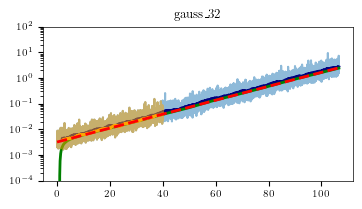

In [255]:
plt.figure(figsize=(4,2))
plt.plot(-samples.logX().iloc[N1:true_endpoint], beta_samples.iloc[N1:true_endpoint], alpha=.5)
plt.plot(-samples.logX().iloc[N1+Nroll-1:true_endpoint], beta_samples_smooth.iloc[N1+Nroll-1:true_endpoint], lw=2, color='navy')
plt.plot(-samples.logX().iloc[:true_endpoint], betas_logL[:true_endpoint], lw=2, color='green')

plt.plot(-points.logX().loc[N1:ndead], beta_points, alpha=.5, color='orange')
plt.plot(-points.logX().loc[N1+Nroll-1:ndead], beta_points_smooth, lw=2, color='orange')

plt.plot(-samples.logX().iloc[:true_endpoint], np.exp(np.log(32*0.01**2) - 2/32 * samples.logX()).iloc[:true_endpoint], lw=2, ls='--', color='red')

plt.yscale('log')
plt.ylim(1e-4, 1e2)
plt.title(f'{name}')

### Plots of dGs

In [390]:
d = 32
iterations, dGs_analytic, dGs_analytic_std = read_from_txt(f'data/analytic/gauss_{d}.txt')
# iterations, dGs_analytic_single, dGs_analytic_single_std = read_from_txt(f'data/analytic/gauss_{d}_single.txt')
iterations, dGs_logL, dGs_logL_std = read_from_txt(f'data/logL/gauss_{d}.txt')
iterations, dGs_DKL, dGs_DKL_std = read_from_txt(f'data/DKL/gauss_{d}.txt')
name, samples = get_samples(f'gauss_{d}')
logXs = samples.logX().loc[iterations.astype(int)]

In [511]:
ndead = 20000
points = points_at_iteration(samples, ndead).recompute()
logXs = points.logX().iloc[ndead]

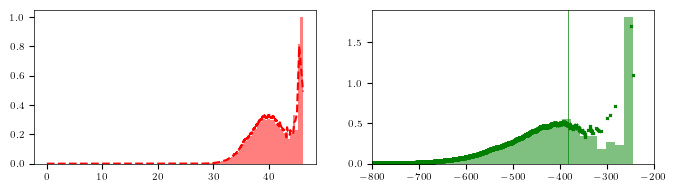

In [671]:
logX = points.logX()
logL = points.logL
betas = get_beta_analytic(logX, d, 0.01).values
beta = betas[ndead]
LXbeta = np.exp(beta*logL + logX)
wbeta = points.set_beta(beta).get_weights()
w = points.get_weights()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,2))
ax1.plot(-logX, LXbeta/LXbeta.max()*0.8, ls='--', color='red')
ax1.hist(-logX, weights=wbeta/wbeta.max(), bins=100, color='red', alpha=.5);

PlogL = (np.exp(beta * logL + logX) * betas).values
ax2.plot(logL, PlogL/PlogL.max()*1.7, 'x', ms=2, color='green')
ax2.hist(logL, weights=wbeta, bins=250, color='green', alpha=.5);
ax2.set_xlim(-800, -200)
ax2.axvline(points.logL_P(beta=beta)/beta, lw=.5, color='green')

Text(0.5, -0.1, '$-\\log X$')

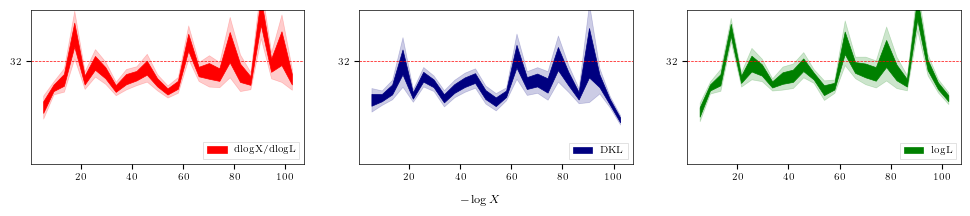

In [362]:
logXs = samples.logX().loc[iterations]
fig, axs = plt.subplots(1, 3, figsize=(12,2))
plot_std(-logXs, dGs_analytic, dGs_analytic_std, d, (0, 1.5), color='red', label='dlogX/dlogL', ax=axs[0])
plot_std(-logXs, dGs_DKL, dGs_DKL_std, d, (0, 1.5), color='navy', label='DKL', ax=axs[1])
plot_std(-logXs, dGs_logL, dGs_logL_std, d, (0, 1.5), color='green', label='logL', ax=axs[2])
for ax in axs:
    ax.legend(loc='lower right')
    ax.set_yticks([d], [d])
fig.supxlabel(r'$-\log X$', y=-0.1)

In [84]:
def logXfs_density(points, ndead, Nset=25, width=100):
    points = points_at_iteration(samples, ndead).recompute()
    logL, X_mean, nk, logZdead = data(points)
    # beta_g = get_beta_analytic(np.log(X_mean[ndead]), 32, 0.01)
    delta_logL = logL[-1] - logL[ndead]
    logX = points.logX(25)
    delta_logX = logX.iloc[-1] - logX.iloc[ndead]
    beta_gs = - delta_logX / delta_logL
    dG = points.d_G(Nset, beta=beta_gs).values
    logLd = logL[ndead:]
    logXf_set = np.zeros(Nset)
    for i in range(Nset):
        X = generate_Xs(nk)
        Xd = X[ndead:]
        d = np.random.choice(dG)
        theta = params_from_d(logLd, Xd, d)
        logXf_set[i] = logXf_formula(theta, logZdead, X_mean[ndead])
    logXf_set = logXf_set[~np.isnan(logXf_set)]
    # logXf_set = reject_outliers(logXf_set)
    return logXf_set, f"{len(logXf_set)} samples, {dG.mean():.1f}"

In [695]:
d = 32
name, samples = get_samples(f'gauss_{d}', reduced=False)
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

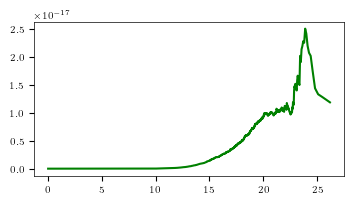

In [712]:
ndead = 10000
points = points_at_iteration(samples, ndead).recompute()
beta = get_beta(points, ndead)
plt.plot(-points.logX(), np.exp(points.logX() + beta*points.logL), color='green');

In [66]:
betas_logL = get_betas_logL(samples)

In [80]:
width = 250
iterations = make_iterations(true_endpoint, 50)
logXs = samples.logX().loc[iterations]
betas_g = np.zeros(len(iterations))
betas_g_std = np.zeros(len(iterations))
for i, ndead in enumerate(iterations):
    points = points_at_iteration(samples, ndead).recompute()
    logL, X_mean, nk, logZdead = data(points)
    # beta_g = get_beta_analytic(np.log(X_mean[ndead]), 32, 0.01)
    delta_logL = logL[-1] - logL[ndead]
    logX = points.logX(25)
    delta_logX = logX.iloc[-1] - logX.iloc[ndead]
    beta_gs = - delta_logX / delta_logL
    betas_g[i] = beta_gs.mean()
    betas_g_std[i] = beta_gs.std()
    print('\r', f'Iteration {i+1}/{len(iterations)}', end='')

 Iteration 50/50

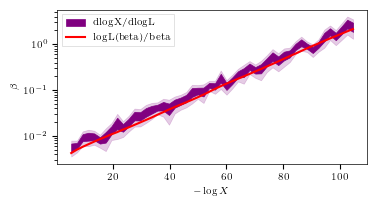

In [83]:
plot_std(-logXs, betas_g, betas_g_std, color='purple', label='dlogX/dlogL')
plt.plot(-logXs, betas_logL[iterations], color='red', label='logL(beta)/beta')
plt.xlabel(r'$-\log X$')
plt.ylabel(r'$\beta$')
plt.legend()
plt.yscale('log')

In [85]:
name, samples = get_samples(f'gauss_32')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
true_logXf = model.true_logXf()

In [86]:
iterations = make_iterations(true_endpoint, 50)
logXfs, logXfs_std = model.logXfs(logXfs_density, iterations, width=25)

 Iteration 52332 of 52332, 25 samples, 31.5

Text(0, 0.5, '$d$')

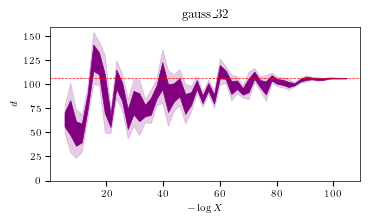

In [92]:
logXs = samples.logX().loc[iterations.astype(int)]
plot_std(-logXs, -logXfs, logXfs_std, -true_logXf, (0, 1.5), color='purple')
plt.title(f'{name}')
plt.xlabel(r'$-\log X$')
plt.ylabel(r'$d$')

Text(0, 0.5, '$d$')

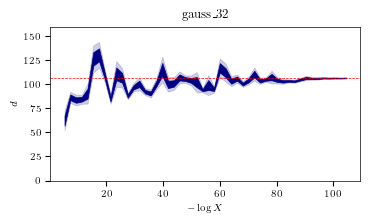

In [22]:
logXs = samples.logX().loc[iterations.astype(int)]
plot_std(-logXs, -logXfs, logXfs_std, -true_logXf, (0, 1.5), color='navy')
plt.title(f'{name}')
plt.xlabel(r'$-\log X$')
plt.ylabel(r'$d$')

Text(0, 0.5, '$d$')

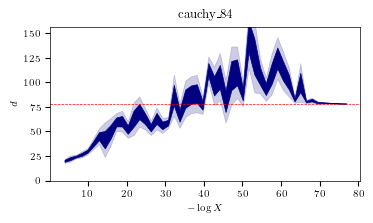

In [11]:
logXs = samples.logX().loc[iterations.astype(int)]
plot_std(-logXs, -logXfs, logXfs_std, -true_logXf, (0, 2), color='navy')
plt.title(f'{name}')
plt.xlabel(r'$-\log X$')
plt.ylabel(r'$d$')

### Scripts to get dGs

In [355]:
d = 8
name, samples = get_samples(f'gauss_{d}')
true_endpoint = EndModel(samples).true_endpoint()

In [356]:
ndeads = make_iterations(true_endpoint, 25)
dGs_analytic, dGs_analytic_std = np.zeros(len(ndeads)), np.zeros(len(ndeads))
for i, ndead in enumerate(ndeads):
    nlive = samples.iloc[ndead].nlive
    logL_k = samples.iloc[ndead].logL
    points = samples.loc[samples.logL_birth < logL_k].recompute()
    logX = points.logX().iloc[ndead]
    beta = get_beta_analytic(logX, d, 0.01)
    dG = points.d_G(nsamples=25, beta=beta)
    dGs_analytic[i], dGs_analytic_std[i] = dG.mean(), dG.std()
    print('\r', f'{i+1}/{len(ndeads)}', end='')
write_to_txt(f'data/analytic/gauss_{d}.txt', [ndeads, dGs_analytic, dGs_analytic_std])

 25/25

In [357]:
betas_logL = get_betas_logL(samples)
print('Got betas')
ndeads = make_iterations(true_endpoint, 25)
dGs_logL, dGs_logL_std = np.zeros(len(ndeads)), np.zeros(len(ndeads))
for i, ndead in enumerate(ndeads):
    beta = betas_logL[ndead]
    nlive = samples.iloc[ndead].nlive
    logL_k = samples.iloc[ndead].logL
    points = samples.loc[samples.logL_birth < logL_k].recompute()
    dG = points.d_G(nsamples=25, beta=beta)
    dGs_logL[i], dGs_logL_std[i] = dG.mean(), dG.std()
    print(f'\rIteration {ndead}/{ndeads[-1]}', end='')
write_to_txt(f'data/logL/gauss_{d}.txt', [ndeads, dGs_logL, dGs_logL_std])

Got betas
Iteration 17955/17955

In [358]:
betas_DKL = get_betas_DKL(samples)
print('Got betas')
ndeads = make_iterations(true_endpoint, 25)
dGs_DKL, dGs_DKL_std = np.zeros(len(ndeads)), np.zeros(len(ndeads))
for i, ndead in enumerate(ndeads):
    beta = betas_DKL[ndead]
    nlive = samples.iloc[ndead].nlive
    logL_k = samples.iloc[ndead].logL
    points = samples.loc[samples.logL_birth < logL_k].recompute()
    dG = points.d_G(nsamples=25, beta=beta)
    dGs_DKL[i], dGs_DKL_std[i] = dG.mean(), dG.std()
    print(f'\rIteration {ndead}/{ndeads[-1]}', end='')
write_to_txt(f'data/DKL/gauss_{d}.txt', [ndeads, dGs_logL, dGs_logL_std])

Got betas
Iteration 17955/17955

In [45]:
dGs, dGs_std = np.zeros(len(ndeads)), np.zeros(len(ndeads))
for i, ndead in enumerate(ndeads):
    nlive = samples.iloc[ndead].nlive
    logL_k = samples.iloc[ndead].logL
    points = samples.loc[samples.logL_birth < logL_k].recompute()
    N1 = 10
    dlogL = points.logL.diff(N1).dropna().loc[:ndead]
    dlogX = points.logX().diff(N1).dropna().loc[:ndead]
    beta_points = -dlogX/dlogL
    Nroll = 500
    beta_points_smooth = beta_points.rolling(Nroll).mean().dropna()
    beta_ndead = beta_points_smooth.iloc[-1]
    dG = points.d_G(nsamples=25, beta=beta_ndead)
    dGs[i], dGs_std[i] = dG.mean(), dG.std()
    # Print progress bar
    print(f'\rIteration {ndead}/{ndeads[-1]}', end='')

Iteration 51318/51318

In [191]:
delta = 250
ndeads = make_iterations(true_endpoint, 25)
dGs_range, dGs_range_std = np.zeros(len(ndeads)), np.zeros(len(ndeads))
for i, ndead in enumerate(ndeads):
    nlive = samples.iloc[ndead].nlive
    logL_k = samples.iloc[ndead].logL
    points = samples.loc[samples.logL_birth < logL_k].recompute()
    logXs = points.logX(25)
    delta_logXs = logXs.iloc[ndead] - logXs.iloc[ndead-delta]
    logL = points.logL
    delta_logL = logL.iloc[ndead] - logL.iloc[ndead-delta]
    betas = -delta_logXs/delta_logL
    dG = points.d_G(nsamples=10, beta=betas)
    dGs_range[i], dGs_range_std[i] = dG.mean(), dG.std()
    print('\r', f'{i+1}/{len(ndeads)}', end='')

 25/25